## Import drive 

In [ ]:
import tensorflow as tf
tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/CE6051 Project files/Debris Images/',
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 49 files belonging to 2 classes.


<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
batch_size=32
#datagen = ImageDataGenerator(rotation_range=30, fill_mode='nearest')
datagen_args = dict(rotation_range=90,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,# rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift # zoom
        horizontal_flip=True,
        vertical_flip=True ,# horizontal flip
        brightness_range=[0.2,1.2])
datagen = ImageDataGenerator(**datagen_args)
datagenerator = datagen.flow_from_directory('/content/drive/MyDrive/CE6051 Project files/Debris Images/',target_size=(128,128),
                                            batch_size=batch_size,interpolation="lanczos",shuffle=True)


ModuleNotFoundError: No module named 'keras'

In [ ]:
b=next(datagenerator)[0]

In [ ]:
b.shape

(32, 128, 128, 3)

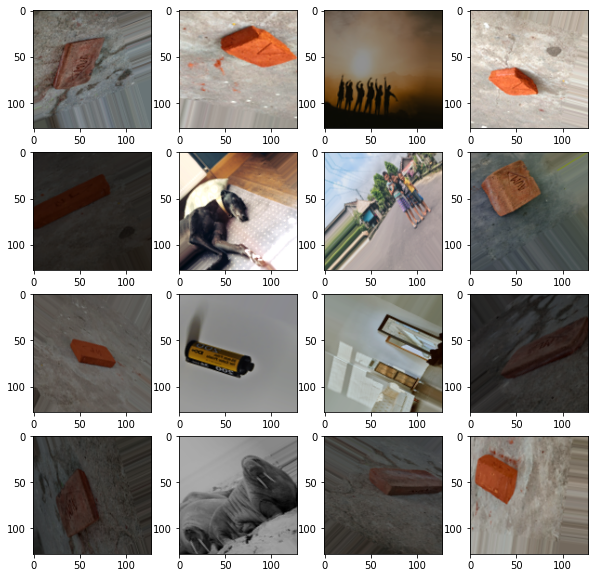

In [ ]:
plt.figure(figsize=[10,10])
for i in range(64):
  plt.subplot(4,4,i+1)
  plt.imshow(b[i])

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(128, 128,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])


In [ ]:
model.fit_generator(
        datagenerator,
        epochs=50,)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 17s 5s/step - loss: 0.7013 - accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - 14s 5s/step - loss: 0.6943 - accuracy: 0.5000
Epoch 3/50
2/2 [==============================] - 14s 10s/step - loss: 0.6935 - accuracy: 0.5000
Epoch 4/50
2/2 [==============================] - 14s 5s/step - loss: 0.6934 - accuracy: 0.5000
Epoch 5/50
2/2 [==============================] - 14s 3s/step - loss: 0.6932 - accuracy: 0.5000
Epoch 6/50
2/2 [==============================] - 14s 4s/step - loss: 0.6931 - accuracy: 0.5000
Epoch 7/50
2/2 [==============================] - 14s 9s/step - loss: 0.6931 - accuracy: 0.5000
Epoch 8/50
2/2 [==============================] - 14s 8s/step - loss: 0.6931 - accuracy: 0.5000
Epoch 9/50
2/2 [==============================] - 14s 4s/step - loss: 0.6931 - accuracy: 0.5000
Epoch 10/50
2/2 [==============================] - 14s 5s/step - loss: 0.6931 - accuracy: 0.5000
Epoch 11/50
2/2 [=====================